<a href="https://colab.research.google.com/github/wizenheimer/cyyrus/blob/feature%2Fadd-example-notebooks/examples/schema_cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

DataOps today looks a mix of ClickOps, CryOps and PrayOps. What if it didn't had to?

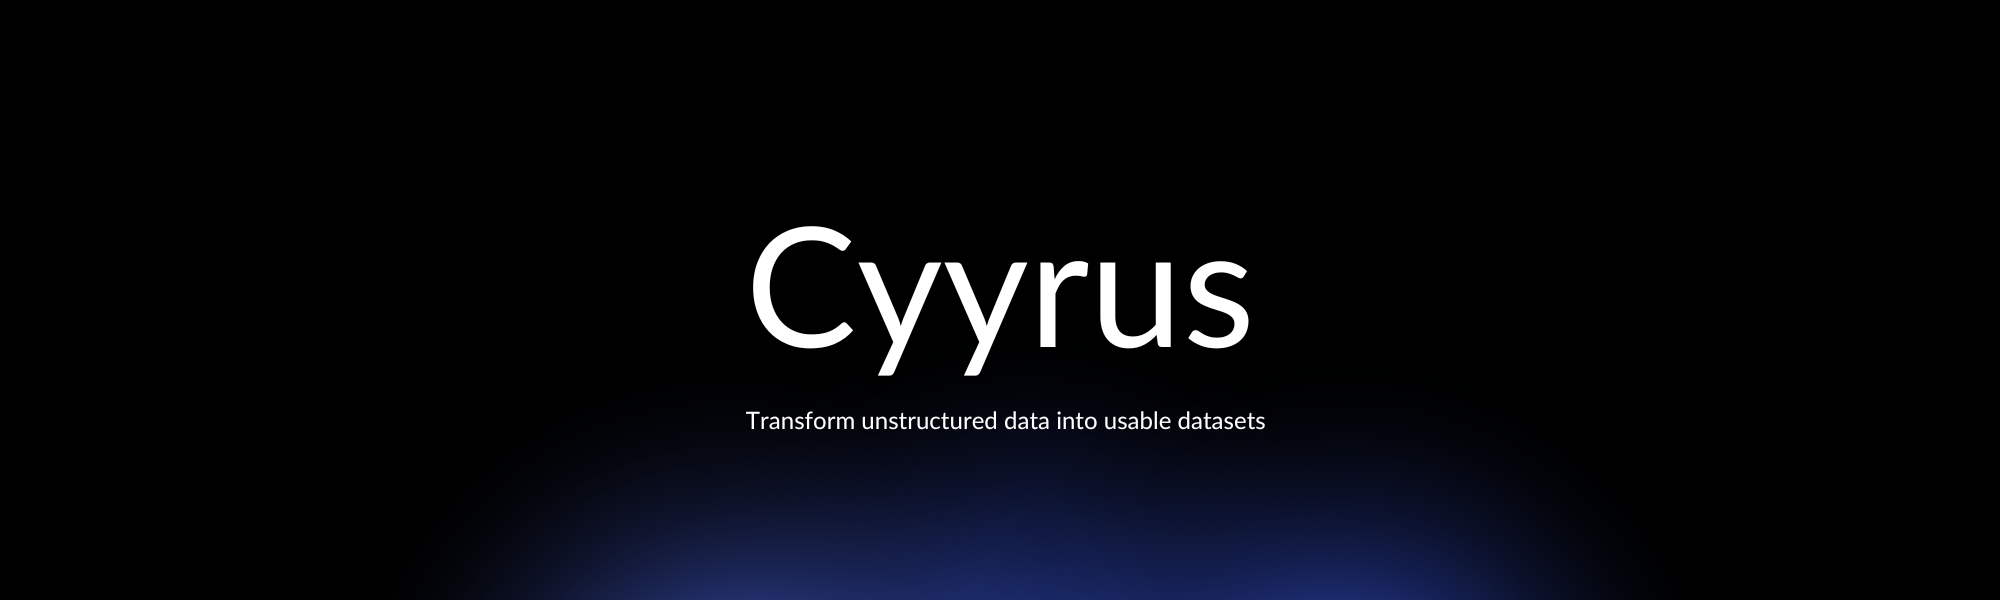

Cyyrus aims to do for datasets, what Terraform did for infrastructure.

## Installing Dependencies

Let's make sure we have pre-requisites in order.

In [ ]:
# @title
!pip install cyyrus -Uq # Install Cyyrus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Generating Schema

Cyyrus makes last mile data transformation YAML configurable.

With Cyyrus, you can configure your schema using a simple YAML file. This might look intimidating. But don't worry, we have created a neat utility to scaffold this schema.

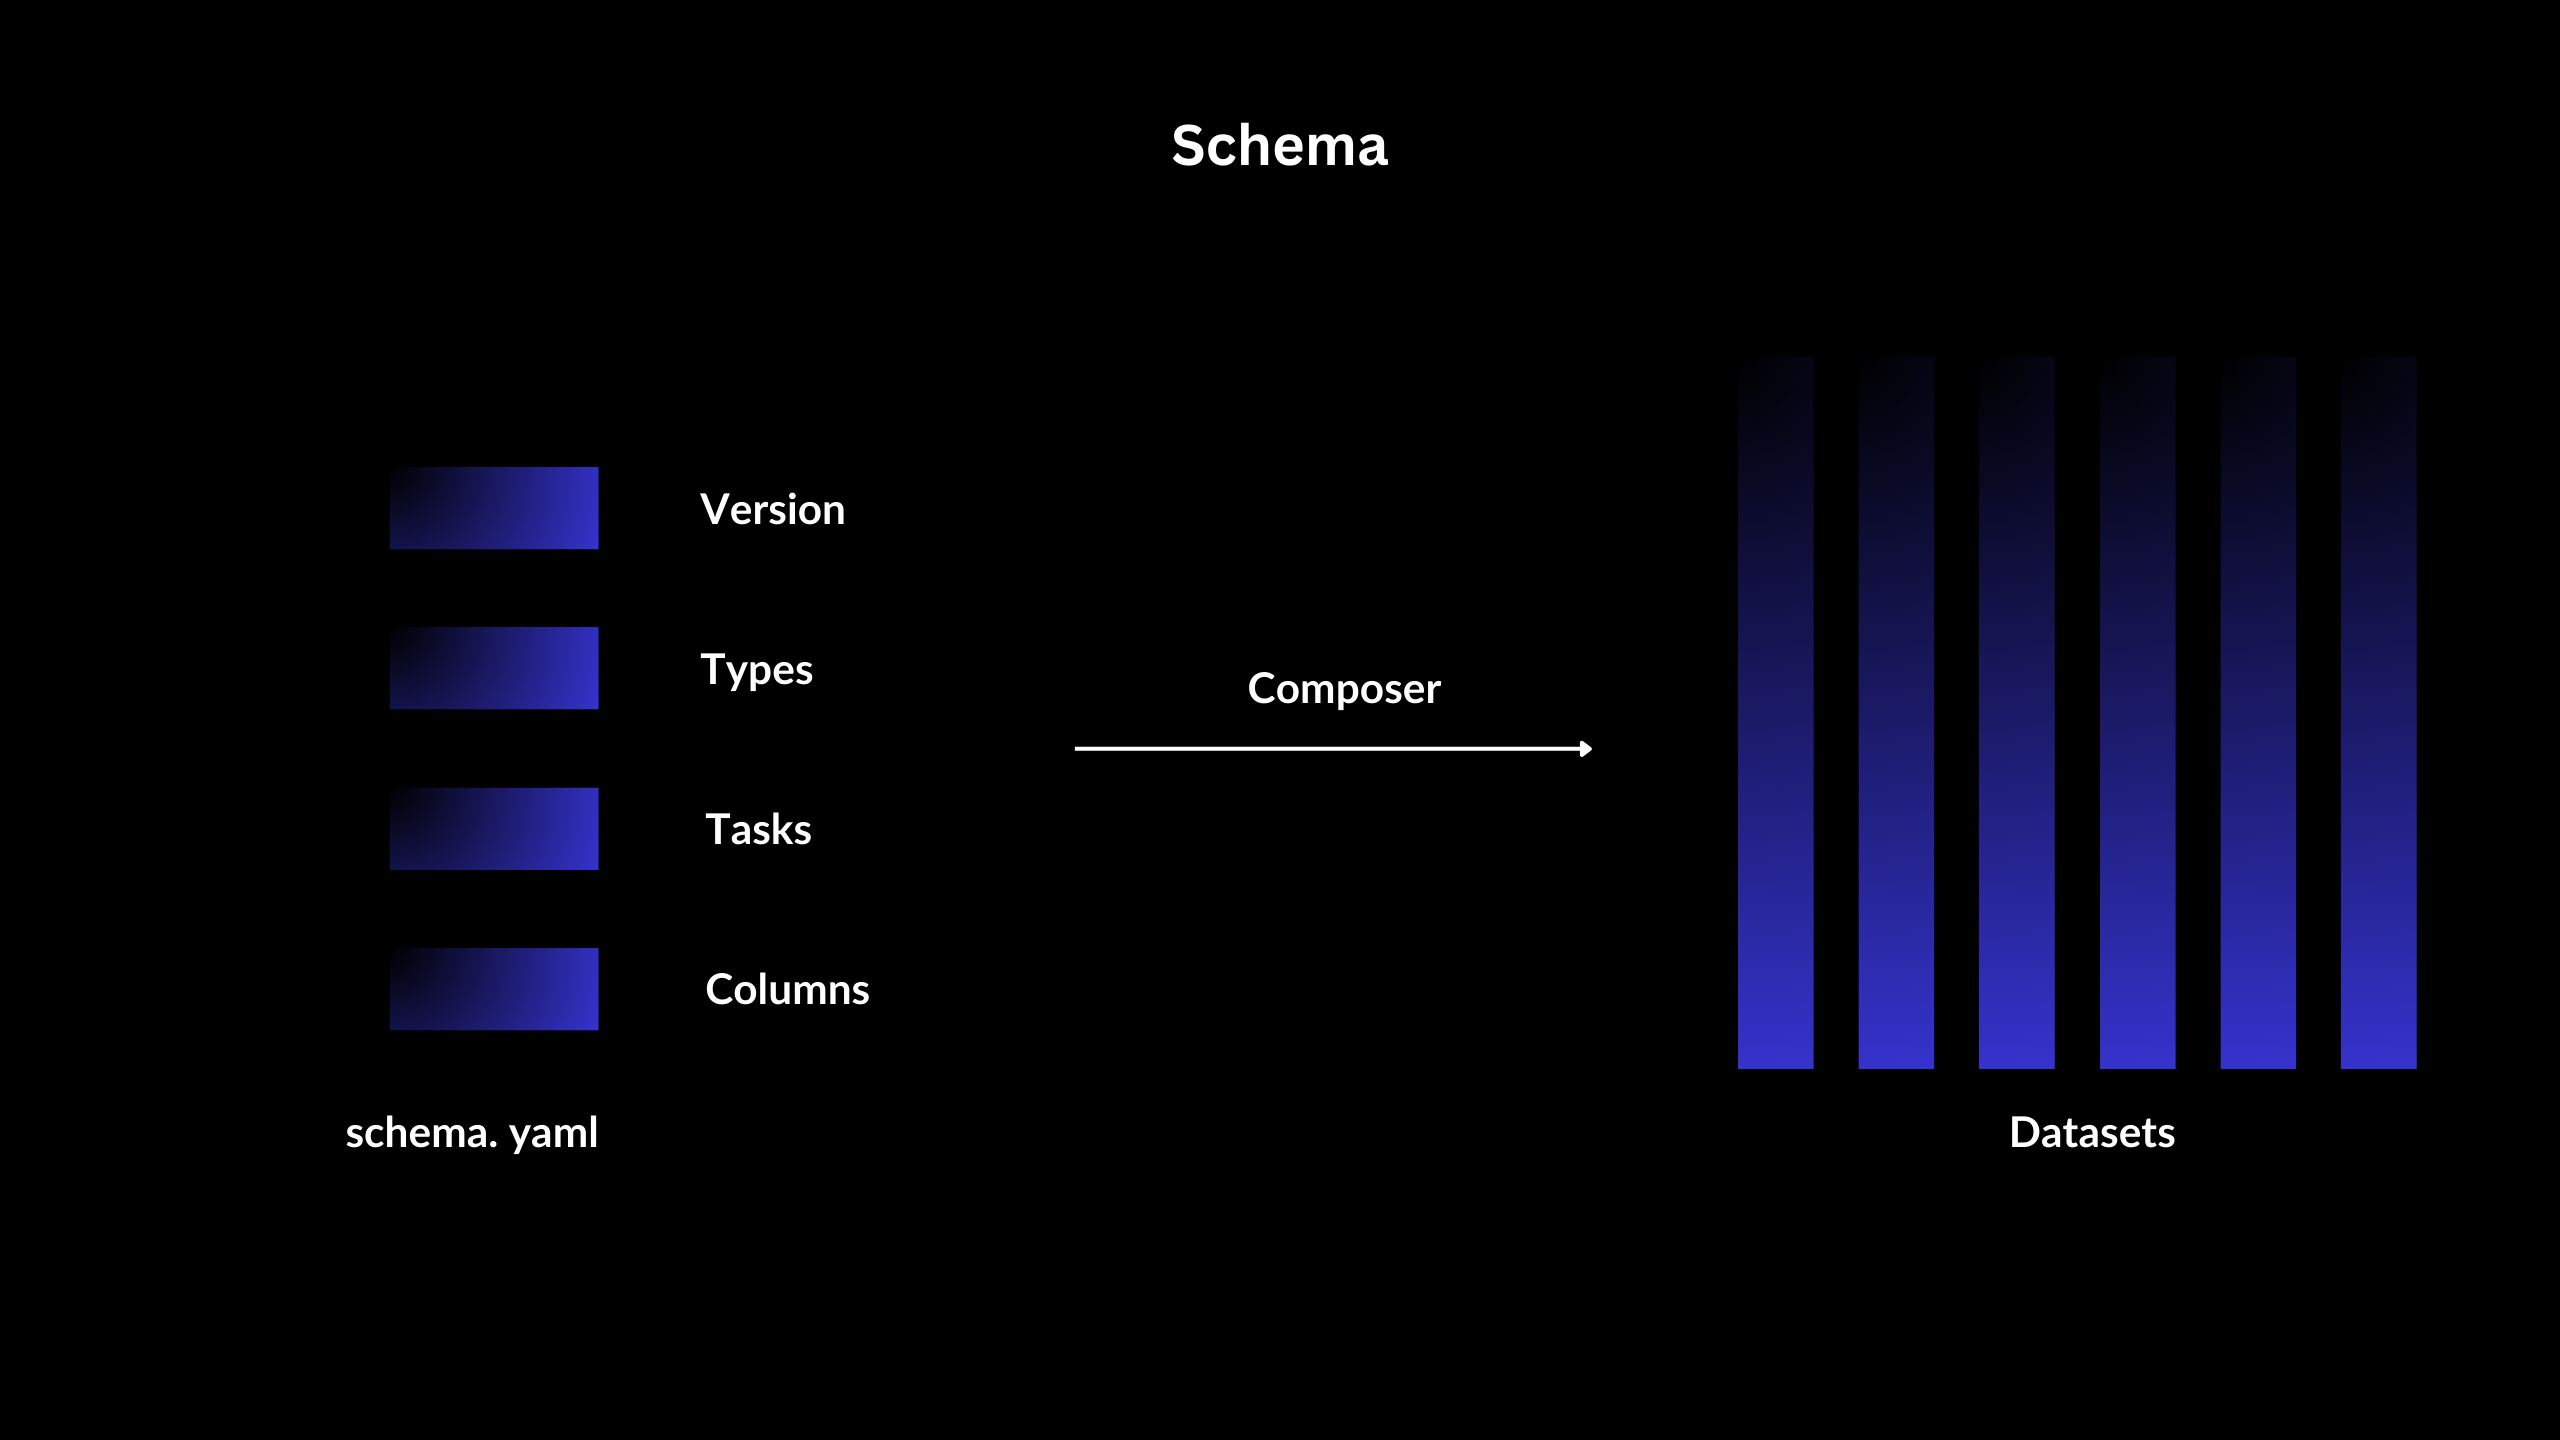

In [ ]:
# @title
import ipywidgets as widgets
import yaml
from IPython.display import clear_output, display


def create_schema():
    output = widgets.Output()
    schema = {} # Variable to store the generated schema

    # Dataset Metadata
    dataset_name = widgets.Text(value="My Dataset", description="Dataset Name:")
    dataset_description = widgets.Textarea(value="Dataset containing some data", description="Description:")
    dataset_tags = widgets.Text(value="cyyrus,dataset", description="Tags:")
    dataset_license = widgets.Text(value="CC-BY-NC-SA", description="License:")
    dataset_languages = widgets.Text(value="en", description="Languages:")

    # Dataset Shuffle and Splits
    shuffle_seed = widgets.IntText(value=42, description="Shuffle Seed:")
    train_split = widgets.FloatSlider(value=0.8, min=0, max=1, step=0.1, description="Train Split:")
    test_split = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.1, description="Test Split:")
    split_seed = widgets.IntText(value=42, description="Split Seed:")

    # Dataset Attributes
    required_columns = widgets.Text(value="", description="Required Columns:")
    unique_columns = widgets.Text(value="", description="Unique Columns:")
    flatten_columns = widgets.Text(value="", description="Flatten Columns:")
    exclude_columns = widgets.Text(value="", description="Exclude Columns:")
    nulls = widgets.RadioButtons(options=['include', 'exclude'], value='include', description="Nulls:")

    # Types
    types = {}
    num_types = widgets.IntText(value=0, description="Number of Types:")

    # Tasks
    tasks = {}
    num_tasks = widgets.IntText(value=0, description="Number of Tasks:")

    # Columns
    columns = {}
    num_columns = widgets.IntText(value=0, description="Number of Columns:")

    def create_primitive_type_widgets():
        return {
            'type_id': widgets.Text(description="Type ID:"),
            'type': widgets.Dropdown(
                options=['string', 'float', 'integer', 'boolean'],
                value='string',
                description="Type:"
            ),
        }

    def create_array_type_widgets():
        return {
            'type_id': widgets.Text(description="Type ID:"),
            'items_type': widgets.Dropdown(
                options=['string', 'float', 'integer', 'boolean', 'object'],
                value='string',
                description="Items Type:"
            ),
            'properties': widgets.Textarea(description="Properties (YAML format):",
                                           value="# For object items type:\n# property_name:\n#   type: string")
        }

    def create_object_type_widgets():
        return {
            'type_id': widgets.Text(description="Type ID:"),
            'properties': widgets.Textarea(description="Properties (YAML format):",
                                           value="property_name:\n  type: string")
        }

    def create_parsing_task_widgets():
        return {
            'name': widgets.Text(description="Task Name:"),
            'type': widgets.Dropdown(options=['parsing', 'generation'], value='parsing', description="Task Type:"),
            'parsed_format': widgets.Dropdown(options=['base64', 'markdown', 'image'], value='base64', description="Parsed Format:"),
            'file_type': widgets.Dropdown(options=['pdf', 'png', 'jpeg', 'jpg'], value='pdf', description="File Type:"),
            'max_depth': widgets.IntText(value=5, description="Max Depth:"),
            'directory': widgets.Text(value="*", description="Directory:"),
            'model': widgets.Text(description="Model (for markdown):"),
            'api_key': widgets.Text(description="API Key (for markdown):")
        }

    def create_generation_task_widgets():
        return {
            'name': widgets.Text(description="Task Name:"),
            'type': widgets.Dropdown(options=['parsing', 'generation'], value='generation', description="Task Type:"),
            'prompt': widgets.Textarea(description="Prompt:"),
            'model': widgets.Dropdown(options=['gpt-4', 'gpt-4o-mini'], value='gpt-4o-mini', description="Model:"),
            'api_key': widgets.Text(description="API Key:"),
            'max_epochs': widgets.IntText(value=100, description="Max Epochs:"),
            'response_format': widgets.Text(description="Response Format:")
        }

    def update_types(change):
        new_value = change['new'] if isinstance(change, dict) else change.new
        for i in range(1, new_value + 1):
            if f"type_{i}" not in types:
                types[f"type_{i}"] = {
                    'category': widgets.RadioButtons(
                        options=['Primitive', 'Composite'],
                        value='Primitive',
                        description=f"Type {i} Category:"
                    ),
                    'composite_type': widgets.RadioButtons(
                        options=['Array', 'Object'],
                        value='Array',
                        description="Composite Type:",
                        layout={'visibility': 'hidden'}
                    ),
                    'widgets': create_primitive_type_widgets()
                }
                types[f"type_{i}"]['category'].observe(lambda c, i=i: update_type_category(c, i), names='value')
                types[f"type_{i}"]['composite_type'].observe(lambda c, i=i: update_composite_type(c, i), names='value')
        for i in range(new_value + 1, len(types) + 1):
            if f"type_{i}" in types:
                del types[f"type_{i}"]
        display_form()

    def update_type_category(change, type_index):
        type_key = f"type_{type_index}"
        if change.new == 'Primitive':
            types[type_key]['widgets'] = create_primitive_type_widgets()
            types[type_key]['composite_type'].layout.visibility = 'hidden'
        else:
            types[type_key]['composite_type'].layout.visibility = 'visible'
            update_composite_type({'new': types[type_key]['composite_type'].value}, type_index)
        display_form()

    def update_composite_type(change, type_index):
        type_key = f"type_{type_index}"
        new_value = change.new if hasattr(change, 'new') else change['new']
        if new_value == 'Array':
            types[type_key]['widgets'] = create_array_type_widgets()
        else:
            types[type_key]['widgets'] = create_object_type_widgets()
        display_form()

    def update_tasks(change):
        new_value = change['new'] if isinstance(change, dict) else change.new
        for i in range(1, new_value + 1):
            if f"task_{i}" not in tasks:
                tasks[f"task_{i}"] = create_parsing_task_widgets()
                tasks[f"task_{i}"]['type'].observe(lambda c, i=i: update_task_type(c, i), names='value')
        for i in range(new_value + 1, len(tasks) + 1):
            if f"task_{i}" in tasks:
                del tasks[f"task_{i}"]
        display_form()

    def update_task_type(change, task_index):
        task_key = f"task_{task_index}"
        if change.new == 'parsing':
            tasks[task_key] = create_parsing_task_widgets()
        else:
            tasks[task_key] = create_generation_task_widgets()
        tasks[task_key]['name'].value = task_key
        tasks[task_key]['type'].value = change.new
        tasks[task_key]['type'].observe(lambda c, i=task_index: update_task_type(c, i), names='value')
        display_form()

    def update_columns(change):
        new_value = change['new'] if isinstance(change, dict) else change.new
        for i in range(1, new_value + 1):
            if f"column_{i}" not in columns:
                columns[f"column_{i}"] = {
                    'name': widgets.Text(value=f"column_{i}", description=f"Column {i} Name:"),
                    'task_id': widgets.Text(value=f"column_{i}", description=f"Column {i} Task ID:"),
                    'task_input': widgets.Text(value="", description=f"Column {i} Task Input:")
                }
        for i in range(new_value + 1, len(columns) + 1):
            if f"column_{i}" in columns:
                del columns[f"column_{i}"]
        display_form()

    num_types.observe(update_types, names='value')
    num_tasks.observe(update_tasks, names='value')
    num_columns.observe(update_columns, names='value')

    def generate_yaml(b):
        config = {
            "spec": "v0",
            "dataset": {
                "metadata": {
                    "name": dataset_name.value,
                    "description": dataset_description.value,
                    "tags": dataset_tags.value.split(","),
                    "license": dataset_license.value,
                    "languages": dataset_languages.value.split(",")
                },
                "shuffle": {"seed": shuffle_seed.value},
                "splits": {
                    "train": train_split.value,
                    "test": test_split.value,
                    "seed": split_seed.value
                },
                "attributes": {
                    "required_columns": required_columns.value.split(",") if required_columns.value else [],
                    "unique_columns": unique_columns.value.split(",") if unique_columns.value else [],
                    "flatten_columns": flatten_columns.value.split(",") if flatten_columns.value else [],
                    "exclude_columns": exclude_columns.value.split(",") if exclude_columns.value else [],
                    "nulls": nulls.value
                }
            },
            "types": {},
            "tasks": {},
            "columns": {}
        }

        for type_key, type_data in types.items():
            type_id = type_data['widgets']['type_id'].value
            if type_data['category'].value == 'Primitive':
                config["types"][type_id] = {
                    "type": type_data['widgets']['type'].value
                }
            elif type_data['composite_type'].value == 'Array':
                config["types"][type_id] = {
                    "type": "array",
                    "items": {
                        "type": type_data['widgets']['items_type'].value
                    }
                }
                if type_data['widgets']['items_type'].value == 'object':
                    config["types"][type_id]["items"]["properties"] = yaml.safe_load(type_data['widgets']['properties'].value)
            else:  # Object
                config["types"][type_id] = {
                    "type": "object",
                    "properties": yaml.safe_load(type_data['widgets']['properties'].value)
                }

        for task_key, task_data in tasks.items():
            task_name = task_data['name'].value
            config["tasks"][task_name] = {
                "task_type": task_data['type'].value,
                "task_properties": {k: v.value for k, v in task_data.items() if k not in ['name', 'type']}
            }

        for column_key, column_data in columns.items():
            column_name = column_data['name'].value
            config["columns"][column_name] = {
                "task_id": column_data['task_id'].value,
                "task_input": column_data['task_input'].value.split(",") if column_data['task_input'].value else []
            }

        nonlocal schema
        for k in config.copy():
          if not config.get(k):
            config.pop(k, None)

        schema = config

        with output:
            clear_output()

    generate_button = widgets.Button(description="Generate Schema", button_style='')
    generate_button.on_click(generate_yaml)


    def get_schema():
        return schema

    def create_section(title, description, *args):
        return widgets.VBox([
            widgets.HTML(f"<h3>{title}</h3>"),
            widgets.HTML(f"<p><em>{description}</em></p>")
        ] + list(args))

    def create_grid(*args, cols=2):
        return widgets.GridBox(children=args, layout=widgets.Layout(
            grid_template_columns=f"repeat({cols}, auto)",
            grid_gap="10px"
        ))

    def display_form():
        clear_output()
        metadata_section = create_section("Dataset Metadata",
            "Provide general information about your dataset, including its name, description, tags, license, and languages.",
            create_grid(dataset_name, dataset_license, dataset_tags, dataset_languages),
            dataset_description
        )

        splits_section = create_section("Dataset Shuffle and Splits",
            "Configure how your dataset will be shuffled and split into training and testing sets.",
            create_grid(shuffle_seed, split_seed, train_split, test_split)
        )

        attributes_section = create_section("Dataset Attributes",
            "Specify required columns, unique columns, columns to flatten or exclude, and how to handle null values.",
            create_grid(required_columns, unique_columns, flatten_columns, exclude_columns),
            nulls
        )

        types_section = create_section("Types",
            "Define the data types used in your dataset. These can be primitive types (string, float, integer, boolean) or composite types (arrays, objects).",
            num_types,
            *[widgets.VBox([
                widgets.HTML(f"<h4>Type {i}</h4>"),
                create_grid(types[f'type_{i}']['category'], types[f'type_{i}']['composite_type']),
                create_grid(*types[f'type_{i}']['widgets'].values())
            ]) for i in range(1, len(types) + 1)]
        )

        tasks_section = create_section("Tasks",
            "Define the tasks to be performed on your dataset. These can be parsing tasks (e.g., extracting information from PDFs or images) or generation tasks (e.g., using AI models to generate content).",
            num_tasks,
            *[widgets.VBox([
                widgets.HTML(f"<h4>Task {i}</h4>"),
                create_grid(*tasks[f'task_{i}'].values())
            ]) for i in range(1, len(tasks) + 1)]
        )

        columns_section = create_section("Columns",
            "Specify the columns in your dataset, associating each with a task and defining its input.",
            num_columns,
            *[widgets.VBox([
                widgets.HTML(f"<h4>Column {i}</h4>"),
                create_grid(*columns[f'column_{i}'].values())
            ]) for i in range(1, len(columns) + 1)]
        )

        display(widgets.VBox([
            metadata_section,
            splits_section,
            attributes_section,
            types_section,
            tasks_section,
            columns_section,
            generate_button,
            output
        ]))

    # Initial update of types, tasks, and columns
    update_types({'new': num_types.value})
    update_tasks({'new': num_tasks.value})
    update_columns({'new': num_columns.value})

    display_form()

    return get_schema


schema_accessor = create_schema()

# Setup Schema

Once you've generated a schema. It's time to parse, preview and validate newly minted schema. Additionally we have some neat reference [here](https://cyyrus.com/schema/overview).

In [22]:
# @title
from cyyrus.composer.core import Composer
from cyyrus.models.spec import Spec
from pydantic import ValidationError
from rich.console import Console
from rich.panel import Panel
from rich.style import Style
from rich.syntax import Syntax
from rich.table import Table
from rich.text import Text
from rich.theme import Theme

# Define explicit black and white colors
BLACK = "rgb(0,0,0)"
WHITE = "rgb(255,255,255)"

# Create a custom theme with explicit white background and black text
custom_theme = Theme({
    "default": f"{BLACK} on {WHITE}",
    "syntax": f"{BLACK} on {WHITE}",
    "error": f"{BLACK} on {WHITE}",
    "warning": f"{BLACK} on {WHITE}",
    "success": f"{BLACK} on {WHITE}",
})

# Create a console with the custom theme and force color system
console = Console(theme=custom_theme, color_system="truecolor", force_terminal=True)

# Assume schema_accessor() is defined elsewhere
schema_config = schema_accessor()

## Preview Schema

Here's how your schema looks. It's got everything you need to generate, process, and structure your data from high-level metadata to specific parsing tasks and output format. There are broadly 4 sections.


1.   `spec`: Nothing fancy here, it's like putting a sick flame decal on cyyrus. As cyyrus evolves, we can increment this version number to reflect changes.
2.   `dataset`:  It defines the overall `structure` and `properties` of our dataset.
3.   `columns`: Columns are like the building blocks of your dataset.
4.   `types`: They are used to define the shape of the data that will be generated. They define the properties of the data, such as the data type, format, and constraints.
5.   `tasks`: It defines the `tasks` that will be used in the dataset generation process. These tasks can include `parsing`, `extraction`, or something else.




In [25]:
# @title
# Function to create and display the schema or error panel
def display_schema_or_error(schema_config):
    if schema_config:
        schema_text = yaml.dump(schema_config, sort_keys=False)
        syntax = Syntax(schema_text, "yaml", line_numbers=True, theme="ansi_light", background_color=WHITE)
        console.print(Panel(syntax, expand=False, border_style=Style(color=BLACK, bgcolor=WHITE)))
    else:
        error_message = "Error: You need to generate a schema first. \nChange the form parameters above and click 'Generate YAML' before previewing.\n"
        error_text = Text(error_message, style=Style(color=BLACK, bgcolor=WHITE))
        error_panel = Panel(
            error_text,
            title_align="left",
            border_style=Style(color=BLACK, bgcolor=WHITE),
            style=Style(color=BLACK, bgcolor=WHITE),
        )
        console.print(error_panel)

display_schema_or_error(schema_config)

╭──────────────────────────────────────────────────────────────────────────╮
│     1 spec: v0                                                           │
│     2 dataset:                                                           │
│     3   metadata:                                                        │
│     4     name: Invoice Dataset                                          │
│     5     description: Dataset containing the invoice data               │
│     6     tags:                                                          │
│     7     - invoice                                                      │
│     8     - financial                                                    │
│     9     - document                                                     │
│    10     license: CC-BY-NC-SA                                           │
│    11     languages:                                                     │
│    12     - en                                                           │
│    13   shuffle:                                                         │
│    14     seed: 42                                                       │
│    15   splits:                                                          │
│    16     train: 0.8                                                     │
│    17     test: 0.2                                                      │
│    18     seed: 42                                                       │
│    19   attributes:                                                      │
│    20     required_columns:                                              │
│    21     - invoice_items                                                │
│    22     - customer_info                                                │
│    23     unique_columns: []                                             │
│    24     flatten_columns:                                               │
│    25     - invoice_items                                                │
│    26     - invoice_qna                                                  │
│    27     exclude_columns:                                               │
│    28     - parsed_invoice                                               │
│    29     nulls: include                                                 │
│    30 types:                                                             │
│    31   invoice_items:                                                   │
│    32     type: array                                                    │
│    33     items:                                                         │
│    34       type: object                                                 │
│    35       properties:                                                  │
│    36         item:                                                      │
│    37           type: string                                             │
│    38         description:                                               │
│    39           type: string                                             │
│    40         amount:                                                    │
│    41           type: float                                              │
│    42   customer_info:                                                   │
│    43     type: object                                                   │
│    44     properties:                                                    │
│    45       customer_name:                                               │
│    46         type: string                                               │
│    47       customer_address:                                            │
│    48         type: string                                               │
│    49       invoice_id:                                                  │
│    50         type: string                                               [38;2;0;0;0;48

## Validate Schema

The Spec looks great. Let's validate it. The following performs validation on the task input definitions to ensure the DAG's integrity:

1.   `Cyclic Dependency Check`: Verifies that no cycles exist in the task dependencies.
2.   `Existence Check`: Confirms that all referenced inputs are defined.
3.   `Type Consistency`: Ensures that input and output data types are compatible.



In [26]:
# @title
# Function to validate and display Spec
def validate_and_display_spec(schema_config):
    try:
        spec = Spec(**schema_config)
        console.print(Panel(
            Text("Spec is validated successfully!", style=Style(color=BLACK, bgcolor=WHITE, bold=True)),
            border_style=Style(color=BLACK, bgcolor=WHITE),
            style=Style(color=BLACK, bgcolor=WHITE)
        ))
    except ValidationError as e:
        table = Table(
            show_header=True,
            header_style=Style(color=BLACK, bgcolor=WHITE, bold=True),
            border_style=Style(color=BLACK, bgcolor=WHITE),
            style=Style(color=BLACK, bgcolor=WHITE),
            box=None
        )
        table.add_column("Field", style=Style(color=BLACK, bgcolor=WHITE), no_wrap=True)
        table.add_column("Error Message", style=Style(color=BLACK, bgcolor=WHITE))

        for error in e.errors():
            field = error.get('loc', ['Unknown'])[0]
            message = error.get('msg', 'Unknown error')
            table.add_row(str(field), message)

        error_panel = Panel(
            table,
            title="Validation Errors",
            title_align="left",
            border_style=Style(color=BLACK, bgcolor=WHITE),
            style=Style(color=BLACK, bgcolor=WHITE),
            padding=(1, 1)
        )
        console.print(error_panel)

validate_and_display_spec(schema_config)

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Spec is validated successfully!                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## Initialize Cyyrus

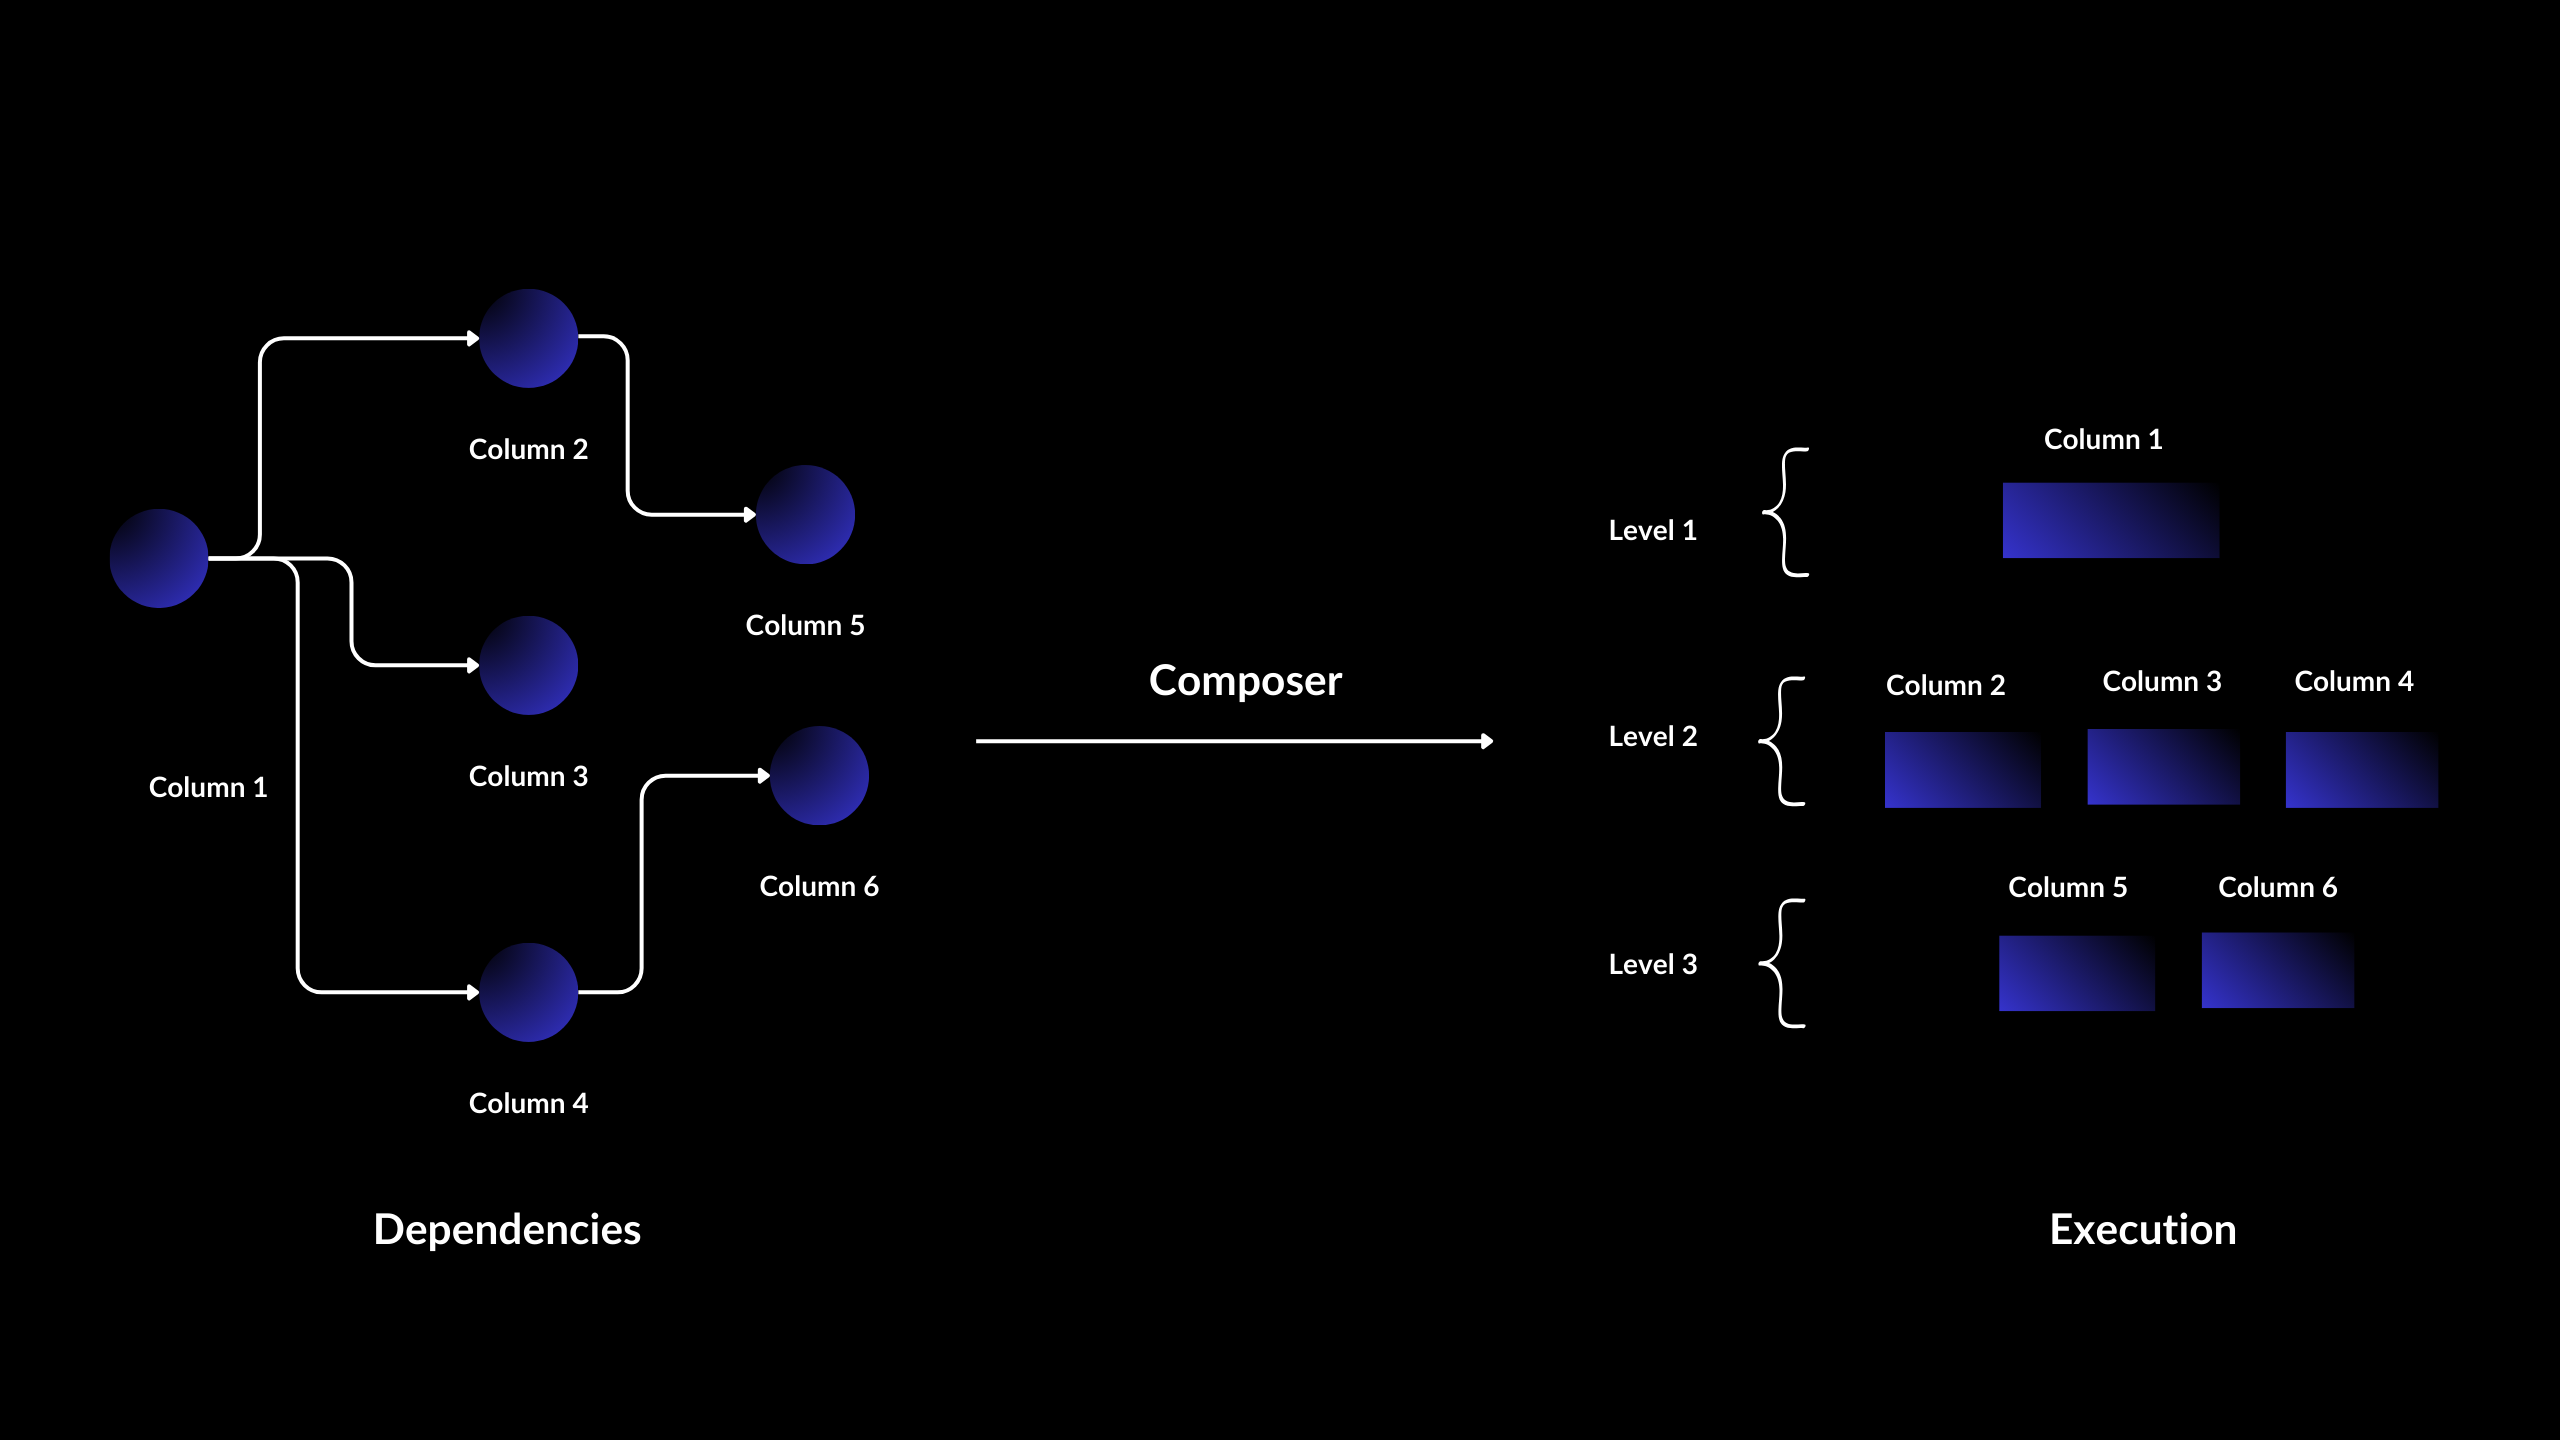

Once initialized with spec, Cyyrus takes care of orchestrating generation.

In [29]:
# @title
spec = Spec(**schema_config)

composer = Composer(spec=spec)

## Preview Execution

Let's preview our execution. During execution, the DAG is traversed to determine the optimal order of task execution, potentially allowing for parallel processing of independent task branches. As tasks complete, their outputs are stored and made available to downstream tasks.

In [30]:
# @title
spec.preview()

### Dry Run

We know you might be a bit nervous about generating a gazillion datapoints right off the bat. So, here you can preview the execution without actually generating data:

In [12]:
# @title
composer.compose(dry_run=True)

## Full Run

But let's be honest, you didn't come here to play pretend. So let's crunch data:

In [14]:
# @title
composer.compose(dry_run=False)

## Inspect Dataset

But we're not done yet! After generation, you'll have the option to export your dataset. But before that let's see how the dataset looks:

In [31]:
# @title
from cyyrus.cli.visualizer import Visualizer

Visualizer.display_dataframe_properties(composer.dataframe)
Visualizer.display_dataset_properties(composer.spec.dataset)

╭────────────────────╮
│ DataFrame Overview │
╰────────────────────╯

Shape: 0 rows, 0 columns

Memory usage: 0.00 MB

                   Column Information                    
╭─────────────┬───────────┬────────────────┬────────────╮
│ Column Name │ Data Type │ Non-Null Count │ Null Count │
├─────────────┼───────────┼────────────────┼────────────┤
╰─────────────┴───────────┴────────────────┴────────────╯

Data Types Overview

╭──────────────────╮
│ Dataset Metadata │
╰──────────────────╯

╭─────────────┬──────────────────────────────────────╮
│ Property    │ Value                                │
├─────────────┼──────────────────────────────────────┤
│ Name        │ Invoice Dataset                      │
│ Description │ Dataset containing the invoice data  │
│ Tags        │ invoice, financial, document, cyyrus │
│ License     │ CC-BY-NC-SA                          │
│ Languages   │ en                                   │
╰─────────────┴──────────────────────────────────────╯

╭─────────────────╮
│ Dataset Shuffle │
╰─────────────────╯

Seed: 42

╭────────────────╮
│ Dataset Splits │
╰────────────────╯

╭───────┬───────╮
│ Split │ Value │
├───────┼───────┤
│ Train │ 0.8   │
│ Test  │ 0.2   │
│ Seed  │ 42    │
╰───────┴───────╯

╭────────────────────╮
│ Dataset Attributes │
╰────────────────────╯

Attributes
├── Required Columns: invoice_items, customer_info
├── Unique Columns: None
├── Nulls: include
├── Flatten Columns: invoice_items, invoice_qna
└── Exclude Columns: parsed_invoice

## Export Dataset

Choose your flavor - JSON, CSV, pickle, parquet - Cyrus has got you covered.

In [20]:
# @title
from ipywidgets import Button, Dropdown, GridspecLayout, Output
from ipywidgets import Text as IPyText
from rich.console import Console
from rich.text import Text as RichText
from rich.theme import Theme

# Define explicit black and white colors
BLACK = "rgb(0,0,0)"
WHITE = "rgb(255,255,255)"

# Create a custom theme with explicit white background and black text
custom_theme = Theme({
    "default": f"{BLACK} on {WHITE}",
    "syntax": f"{BLACK} on {WHITE}",
    "error": f"{BLACK} on {WHITE}",
    "warning": f"{BLACK} on {WHITE}",
    "success": f"{BLACK} on {WHITE}",
})

# Create a console with the custom theme and force color system
console = Console(theme=custom_theme, color_system="truecolor", force_terminal=True)

# Create Dropdown widget for export_format
export_format_dropdown = Dropdown(
    options=['json', 'csv', 'huggingface', 'pickle', 'parquet'],
    value='json',
    description='Export Format:',
)

# Create Text widget for full_export_path
full_export_path_text = IPyText(
    value='',
    placeholder='Enter the full path for export',
    description='File Path:',
)

# Create Button widget to trigger export
export_button = Button(
    description='Export',
    button_style='',  # Remove default styling
)

# Create an output widget for displaying rich text output
output = Output()

# Define the callback function for button click
def on_export_button_clicked(b):
    export_format = export_format_dropdown.value
    full_export_path = full_export_path_text.value

    with output:
        output.clear_output()
        if not full_export_path:
            error_message = "File path is empty. Please enter a valid path before exporting."
            error_text = RichText(error_message, style=Style(color=BLACK, bgcolor=WHITE))
            error_panel = Panel(
                error_text,
                title="Error",
                title_align="left",
                border_style=Style(color=BLACK, bgcolor=WHITE),
                style=Style(color=BLACK, bgcolor=WHITE),
            )
            console.print(error_panel)
        else:
            try:
                # Call the export function (assuming 'composer' is defined elsewhere)
                composer.export(export_format=export_format, filepath=full_export_path)
                success_text = RichText(f"Successfully exported as {export_format} to {full_export_path}",
                                    style=Style(color=BLACK, bgcolor=WHITE, bold=True))
                success_panel = Panel(
                    success_text,
                    title="Success",
                    title_align="left",
                    border_style=Style(color=BLACK, bgcolor=WHITE),
                    style=Style(color=BLACK, bgcolor=WHITE)
                )
                console.print(success_panel)
            except Exception as e:
                error_message = str(e)
                error_text = RichText(error_message, style=Style(color=BLACK, bgcolor=WHITE))
                error_panel = Panel(
                    error_text,
                    title="Export Failed",
                    title_align="left",
                    border_style=Style(color=BLACK, bgcolor=WHITE),
                    style=Style(color=BLACK, bgcolor=WHITE)
                )
                console.print(error_panel)

# Attach the callback function to the button click event
export_button.on_click(on_export_button_clicked)

# Create a grid layout with 3 rows and 2 columns
grid = GridspecLayout(3, 2, height='200px')

# Place widgets in the grid
grid[0, 0] = export_format_dropdown
grid[0, 1] = full_export_path_text
grid[1, :] = export_button
grid[2, :] = output

# Display the grid layout
display(grid)

GridspecLayout(children=(Dropdown(description='Export Format:', layout=Layout(grid_area='widget001'), options=…

## Publish Dataset

Okay our data looks fabulous. Let's make it official. Shall we?

Cyrus is best buddies with Hugging Face, and it's ready to help you publish your dataset.

In [21]:
# @title
from IPython.display import display
from ipywidgets import Button, Checkbox, GridspecLayout, Output, Text
from rich.console import Console
from rich.theme import Theme

# Define explicit black and white colors
BLACK = "rgb(0,0,0)"
WHITE = "rgb(255,255,255)"

# Create a custom theme with explicit white background and black text
custom_theme = Theme({
    "default": f"{BLACK} on {WHITE}",
    "syntax": f"{BLACK} on {WHITE}",
    "error": f"{BLACK} on {WHITE}",
    "warning": f"{BLACK} on {WHITE}",
    "success": f"{BLACK} on {WHITE}",
})

# Create a console with the custom theme and force color system
console = Console(theme=custom_theme, color_system="truecolor", force_terminal=True)

# Create Text widget for repository_id
repository_id_text = Text(
    value='',
    placeholder='Enter repository ID',
    description='Repository ID:',
)

# Create Text widget for huggingface_token
huggingface_token_text = Text(
    value='',
    placeholder='Enter Hugging Face token',
    description='Hugging Face Token:',
)

# Create Checkbox widget for is_private
is_private_checkbox = Checkbox(
    value=False,
    description='Private',
)

# Create Button widget to trigger publish
publish_button = Button(
    description='Publish',
    button_style='',  # Remove default styling
)

# Create an output widget for displaying rich text output
output = Output()

# Define the callback function for button click
def on_publish_button_clicked(b):
    repository_id = repository_id_text.value
    huggingface_token = huggingface_token_text.value
    is_private = is_private_checkbox.value

    with output:
        output.clear_output()
        if not repository_id or not huggingface_token:
            error_message = "Repository ID and Hugging Face token cannot be empty. Please provide valid values."
            error_text = RichText(error_message, style=Style(color=BLACK, bgcolor=WHITE))
            error_panel = Panel(
                error_text,
                title="Error",
                title_align="left",
                border_style=Style(color=BLACK, bgcolor=WHITE),
                style=Style(color=BLACK, bgcolor=WHITE),
            )
            console.print(error_panel)
        else:
            try:
                # Call the publish function
                composer.publish(repository_id=repository_id, huggingface_token=huggingface_token, private=is_private)
                success_text = RichText(f"Successfully published to repository {repository_id}",
                                        style=Style(color=BLACK, bgcolor=WHITE, bold=True))
                success_panel = Panel(
                    success_text,
                    title="Success",
                    title_align="left",
                    border_style=Style(color=BLACK, bgcolor=WHITE),
                    style=Style(color=BLACK, bgcolor=WHITE)
                )
                console.print(success_panel)
            except Exception as e:
                error_message = str(e)
                error_text = RichText(error_message, style=Style(color=BLACK, bgcolor=WHITE))
                error_panel = Panel(
                    error_text,
                    title="Publish Failed",
                    title_align="left",
                    border_style=Style(color=BLACK, bgcolor=WHITE),
                    style=Style(color=BLACK, bgcolor=WHITE)
                )
                console.print(error_panel)

# Attach the callback function to the button click event
publish_button.on_click(on_publish_button_clicked)

# Create a grid layout with 3 rows and 2 columns
grid = GridspecLayout(3, 2, height='200px')

# Place widgets in the grid
grid[0, 0] = repository_id_text
grid[0, 1] = huggingface_token_text
grid[1, 0] = is_private_checkbox
grid[1, 1] = publish_button
grid[2, :] = output

# Display the grid layout
display(grid)

GridspecLayout(children=(Text(value='', description='Repository ID:', layout=Layout(grid_area='widget001'), pl…